<a href="https://colab.research.google.com/github/uri-rizo2/DIgit_Recognizer/blob/main/DigRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer using MNIST dataset


---

By: Uriel Amezcua

In [1]:
# Install TensorFlow (if not already installed)
!pip install tensorflow

# Import the required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



 In this code snippet:

*   we use **matplotlib.pyplot** to create a grid of subplots to display the images
*   We then iterate over the first 10 images from the training set (x_train) and their corresponding labels (y_train) and plot them using imshow().
*   We set the colormap (cmap) to grayscale for displaying the images.

*  and the set_title() function is used to display the label for each image, and axis('off') is used to hide the axes.





11490434/11490434 [==============================] - 0s 0us/step


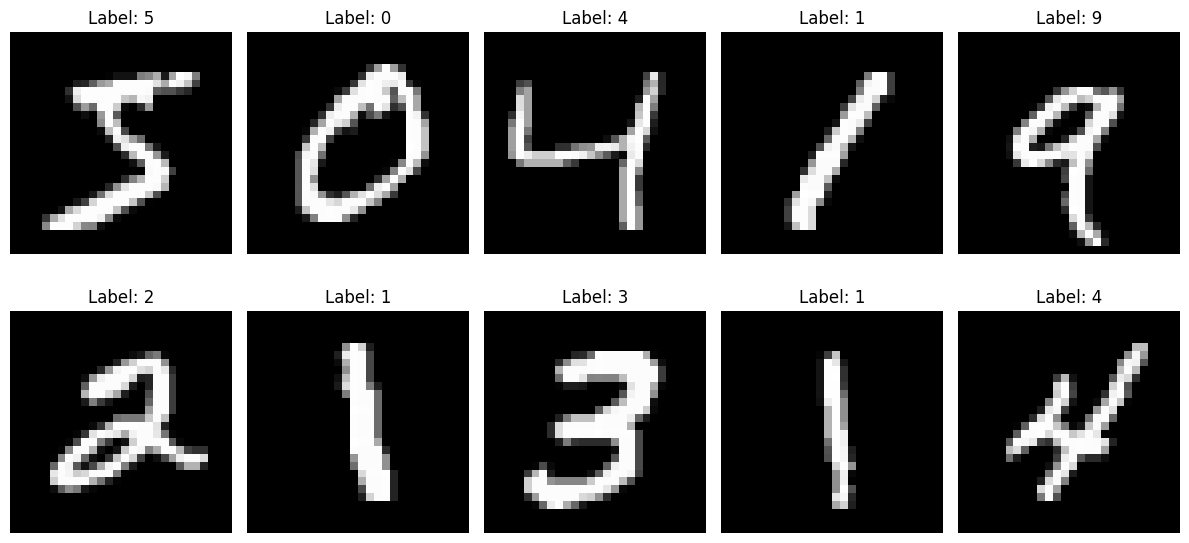

In [2]:
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Preprocess data for model


---


* this code snippet performs preprocessing steps on the input images and labels.
  - It normalizes the pixel values,
  - reshapes the images to include a channel dimension,
  - and converts the labels to a one-hot encoded format.

* It also provides the starting code for data augmentation and splitting a validation set. I would like to come back and try and do this for better results


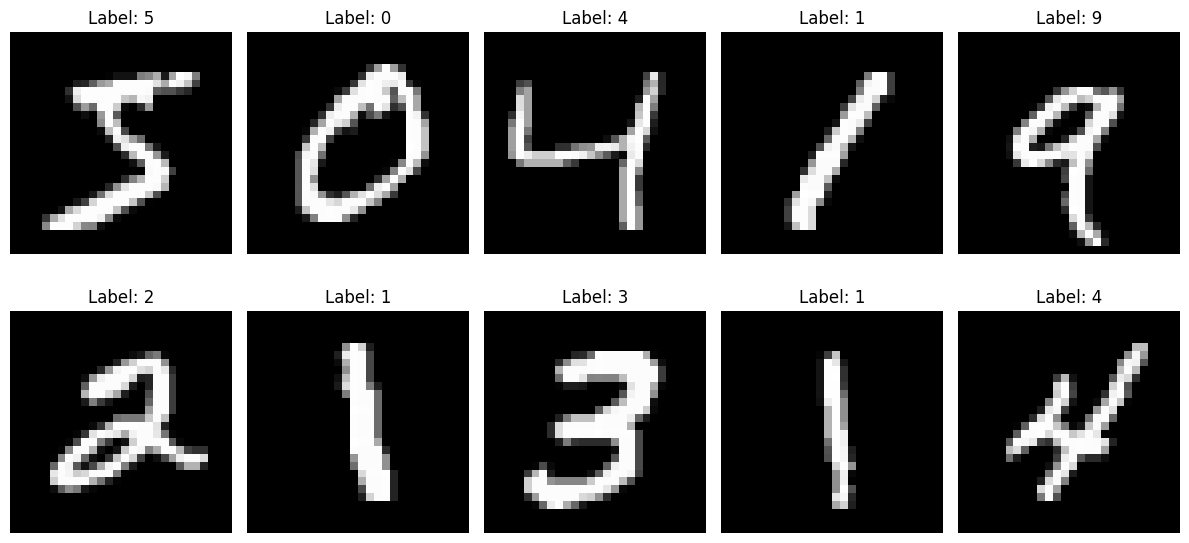

In [3]:

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input images
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Perform data augmentation (might come back to this at a later time)
# Apply transformations such as rotation, translation, etc. to increase dataset size

# Split a portion of the training set as a validation set (might come back to do this also lol)
# x_train, x_val = x_train[:-val_size], x_train[-val_size:]
# y_train, y_val = y_train[:-val_size], y_train[-val_size:]

# Display a few preprocessed sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i].argmax()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# QC for Data preprocess


---


*  Normalization of pixel values
*  Reshaping of input
*  one hot encoding labels

In [6]:
import numpy as np


# Validate the data preprocessing
print("Normalized Pixel Values:")
print("Min Value:", np.min(x_train), "Max Value:", np.max(x_train))
print()

print("Reshaped Input Images:")
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print()

print("One-Hot Encoded Labels:")
print("y_train[0]:", y_train[0])
print("y_test[0]:", y_test[0])
print()



Normalized Pixel Values:
Min Value: 0.0 Max Value: 1.0

Reshaped Input Images:
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)

One-Hot Encoded Labels:
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



# Defining Model Architecture


---


This snippet defines a sequential model with convolutional and dense layers for digit recognition.

The convolutional layers extract features from the input images, while the dense layers learn to classify the extracted features into different digit classes.

In [7]:


# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

# Compiling the model



---


*   **loss='categorical_crossentropy'**: This argument specifies the loss function to be used.

*   **optimizer='sgd'**: This argument specifies the optimizer to be used during training. (Stochastic Gradient Descent (SGD))
*   **metrics=['accuracy']**: This argument specifies the evaluation metric(s) to be computed during training and evaluation. (accuracy)



In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
              optimizer='sgd',  # Stochastic Gradient Descent optimizer
              metrics=['accuracy'])  # Evaluation metric to monitor during training


# Training the model


---


*   Feed the training data to the model
*   Specify the number of epochs and batch size
*   Monitor the training process
*   Monitor the training process







In [ ]:
# Train the model
history = model.fit(x_train, y_train,  # Training data
                    epochs=10,  # Number of epochs
                    batch_size=32,  # Batch size
                    #validation_data=(x_val, y_val))  # Validation data (optional)
                    )


# Visualizing results


---



*   The function plots the training accuracy curve using the extracted accuracy values.
  - This curve shows how the accuracy of the model changes over the epochs of training. The x-axis represents the epochs, and the y-axis represents the accuracy values.



*   The function also plots the training loss curve using the extracted loss values.
  - This curve shows how the loss of the model changes over the epochs of training. The x-axis represents the epochs, and the y-axis represents the loss values.


*   Finally, the function displays the two plots: one for training accuracy and one for training loss.



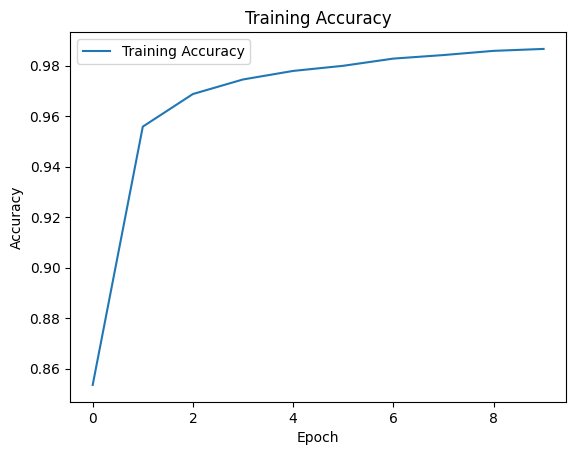

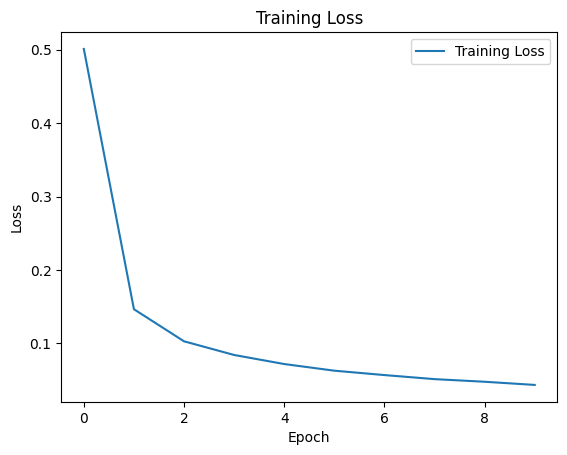

In [37]:
# Plot training accuracy and loss curves
def plot_accuracy_loss(history):
    # Extract accuracy and loss values from the history object
    accuracy = history.history['accuracy']
    loss = history.history['loss']

    # Plot accuracy
    plt.plot(accuracy, label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(loss, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



# Call the plot_accuracy_loss function with the history object
plot_accuracy_loss(history)


# Evaluating the model


---



*   The code calls the evaluate method of the trained model and provides the test data (x_test and y_test) as input.

*   The evaluate method calculates the loss and accuracy of the model on the provided test data.
  - **Loss** represents how well the model is performing in terms of the difference between the predicted and actual values.
  - **Accuracy** represents the percentage of correctly predicted values.



*   The calculated loss and accuracy values are then assigned to the variables loss and accuracy, respectively.
*   Finally, the code prints the test loss and test accuracy using the print statement. The .4f format specifier is used to display the loss and accuracy values with four decimal places for better readability







In [38]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9861
Test loss: 0.0442
Test accuracy: 0.9861


# Making predictions and displaying them


---


*   here we use the trained model to make predictions on the test data (x_test) using the predict method.
  - This generates predicted values for each input in the test set. The predicted values are stored in the **y_pred** variable.

* We use the np.argmax function to modify the arrays of true labels (y_test) and predicted labels (y_pred)
  -  The argmax function returns the indices of the maximum values along a specified axis.
  -  In this case, np.argmax(y_test, axis=1) returns the indices of the maximum values for each test sample, effectively converting the one-hot encoded labels into their original form.
  - The modified true labels are stored in the labels variable, and the modified predicted labels are stored in the predictions variable.

* Finally, we call  the display_sample_predictions function with the modified arrays (x_test, labels, predictions, classes).
* This function displays a set of sample images from the test set along with their true labels and predicted labels, allowing us to visually compare the model's predictions.




313/313 [==============================] - 2s 8ms/step


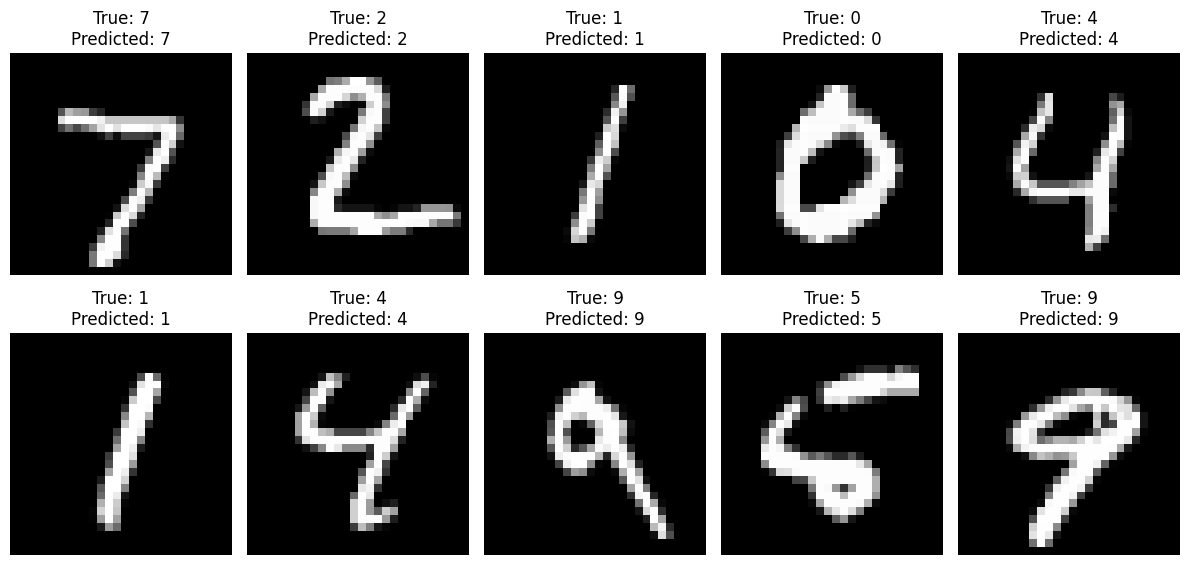

In [29]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Modify the code to flatten the labels and predictions arrays
labels = np.argmax(y_test, axis=1)
predictions = np.argmax(y_pred, axis=1)

# Call the display_sample_predictions function with the modified arrays
display_sample_predictions(x_test, labels, predictions, classes)

